# Tech Salary Prediction 2017-2018

## Phase 2 : Predicitve Modelling

#### Name : Munish Sabherwal      
#### Student ID : s3915526

## Table of Contents:

- [Introduction:](#Introduction)
  - [Dataset Source](#Dataset-Source)
  - [Phase 1 Summary](#Phase-1-Summary)
  - [Report Overview](#Report-Overview)
  - [Overview of Methodology](#Overview-of-Methodology)
- [Goals and Objectives](#Goals-and-Objectives)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
    - [One Hot Code](#One-Hot-Code)
    - [Correlation and Multicollinearity](#Correlation-and-Multicollinearity)
- [Predictive Modelling](#Predicitve-Modelling)
  - [Feature Selection](#Feature-Selection)
  - [Model Fitting & Tuning](#Model-Fitting-&Tuning)
- [Neural Network Model Fitting and Tuning](#Neural-Network-Model-Fitting-and-Tuning)
- [Model Comparison](#Model-Comparison)
- [Critique and Limitations](#Critique-and-Limitations)
- [Summary & Conclusion](#Summary-&-Conclusion)
     - [Project Summary](#Project-Summary)
     - [Findings](#Findings)
     - [Conclusions](#Conclusions)
- [References](#References)

## Introduction






### Dataset Source

The tech salary prediction dataset has been sourced from Kaggle(Devastator,2022, November 16). The dataset contains salaries appropriated to jobs in the tech field for the year 2017-2018 as per Glassdoor.


#### Dataset Retrieval

 - We have downloaded the dataset and have saved in the same directory as the jupyter notebook
 - We use pandas to read the data into jupyter and explore 10 randomly sampled rows from the dataset
 - As the first row of the dataset is an ID column we have indexed it such that it does not interfere with our predicitive modelling in the next phase


### Phase 1 Summary
In Phase I of this project, we focused on data cleaning, preprocessing, and exploratory data analysis for the Tech Salary dataset. We conducted thorough data cleaning by removing irrelevant variables and handling missing values and outliers. Through visualizations, we gained insights into the relationship between salary and various factors such as job roles, company types, and skills. We also explored the distribution of the target variable and identified the need for scaling or transformation to address outliers.

## Report Overview

Phase II of this project focuses on predictive modeling for the Tech Salary dataset. In this phase, our objective is to develop a reliable model that can accurately predict the mean salary for tech job positions. Building upon the data cleaning, preprocessing, and exploratory data analysis conducted in Phase I, we will now delve into the realm of machine learning to construct a predictive model.

Through Phase II, we aim to leverage the power of machine learning to create a robust model that accurately predicts mean salaries for tech job positions, contributing to the advancement of data-driven decision-making in the tech industry.

To accomplish this, we will employ various regression algorithms and techniques. Regression analysis is particularly suited for predicting continuous numerical values, making it an ideal approach for estimating salaries. We will explore different regression algorithms, such as linear regression, decision tree regression, random forest regression, and potentially other advanced regression models, to identify the best-performing model for our dataset.



### Overview of Methodlogy


The predictive modeling phase will involve several key steps. We will split the dataset into training and testing sets to evaluate the performance of the models on unseen data. Feature engineering and selection techniques will be applied to identify the most influential features for salary prediction. Additionally, hyperparameter tuning will be performed to optimize the models and enhance their predictive capabilities.

The evaluation of our models will be based on various metrics, including mean squared error (MSE), root mean squared error (RMSE)and R-squared score. These metrics will help us assess the accuracy and performance of the models in predicting the mean salary.

Ultimately, the successful development of a reliable predictive model will provide valuable insights into the salary landscape of the tech industry. It can benefit employers by enabling them to make informed decisions regarding salary offerings, aid job seekers in negotiating competitive salaries, and assist analysts and stakeholders in gaining a deeper understanding of salary trends and factors influencing compensation in the tech job market.

In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None) 
salary = pd.read_csv("eda_data.csv", index_col = 0)

In [3]:
salary.iloc[:,:].sample(n=10, random_state=999)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
129,Data Scientist,$60K-$102K (Glassdoor est.),"Who We Are!\n\nAt Maven Wave, we are relentles...",4.4,Maven Wave Partners\n4.4,"Chicago, IL","Chicago, IL",201 to 500 employees,2008,Company - Private,Consulting,Business Services,$50 to $100 million (USD),-1,0,0,60,102,81.0,Maven Wave Partners,IL,1,12,1,0,0,1,1,data scientist,na,3154,0
683,"Data Analyst 1, full-time contract worker for ...",$35K-$65K (Glassdoor est.),"Purposes\n\nIn addition to your application, p...",4.2,The Church of Jesus Christ of Latter-day Saint...,"Salt Lake City, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,-1,0,0,35,65,50.0,The Church of Jesus Christ of Latter-day Saints,UT,1,-1,0,0,0,1,1,analyst,na,4525,0
489,Machine Learning Engineer - Regulatory,$61K-$113K (Glassdoor est.),Job Description\n\n\nWhat We Do\n\nWe develop ...,3.7,Cboe Global Markets\n3.7,"Lenexa, KS","Chicago, IL",501 to 1000 employees,1973,Company - Public,Stock Exchanges,Finance,$500 million to $1 billion (USD),-1,0,0,61,113,87.0,Cboe Global Markets,KS,0,47,1,0,0,0,1,mle,na,2860,0
456,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,0,81,140,110.5,ALIN,NY,0,-1,1,0,0,0,0,data scientist,na,1838,0
382,Associate Environmental Scientist - Wildlife B...,$38K-$64K (Glassdoor est.),"QK, Inc., formerly Quad Knopf, has served a di...",4.7,QK\n4.7,"Clovis, CA","Visalia, CA",51 to 200 employees,1972,Company - Private,Architectural & Engineering Services,Business Services,$10 to $25 million (USD),-1,0,0,38,64,51.0,QK,CA,0,48,0,0,0,0,1,na,na,4223,0
100,Data Scientist,$89K-$153K (Glassdoor est.),The Data Scientist will be joining a team of e...,3.8,7Park Data\n3.8,"New York, NY","New York, NY",51 to 200 employees,2012,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1,0,0,89,153,121.0,7Park Data,NY,1,8,1,0,1,0,0,data scientist,na,3443,0
451,Data Scientist,$111K-$176K (Glassdoor est.),"Headquartered in Brisbane, Calif., CareDx, Inc...",2.5,CareDx\n2.5,"Brisbane, CA","Brisbane, CA",1 to 50 employees,-1,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,Sequenom,0,0,111,176,143.5,CareDx,CA,1,-1,1,0,0,0,1,data scientist,na,3885,1
252,"Scientist, Analytical Development",$42K-$82K (Glassdoor est.),Rubius Therapeutics is a clinical-stage biopha...,4.4,Rubius Therapeutics\n4.4,"Cambridge, MA","Cambridge, MA",201 to 500 employees,2013,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),-1,0,0,42,82,62.0,Rubius Therapeutics,MA,1,7,0,0,0,0,0,na,na,5512,0
665,Data Engineer,$55K-$105K (Glassdoor est.),Who is Trace3?\n\nTrace3 is a leading Transfor...,3.4,Trace3\n3.4,"Houston, TX","Irvine, CA",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$1 to $2 billion (USD),"World Wide Technology, Presidio, Optiv",0,0,55,105,80.0,Trace3,TX,0,18,1,0,1,0,1,data engineer,na,7802,3
378,"Marketing Data Analyst, May 2020 Undergrad",$44K-$86K (Glassdoor est.),Fareportal is seeking a Marketing Data Analyst...,3.8,Fareportal\n3.8,"New York, NY","New York, NY",1001 to 5000 employees,2002,Company - Private,Travel Agencies,Travel & Tourism,$2 to $5 billion (USD),"Expedia Group, Orbitz Worldwide, Priceline.com",0,0,44,86,65.0,Fareportal,NY,1,18,0,0,0,0,1,analyst,na,2501,3


In [4]:
salary.shape

(742, 32)

In [5]:
salary['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

## Dataset Features

In [6]:
from tabulate import tabulate

data = [
    ['Job Title', 'Text', '-', 'Title of the job position'],
    ['Job Description', 'Text', '-', 'Description of the job position'],
    ['Rating', 'Numeric', '/5', 'Rating of the company by employees or third-party organizations'],
    ['Location', 'Text', '-', 'City and state where the job is located'],
    ['Headquarters', 'Text', '-', 'City and state where the company is headquartered'],
    ['Size', 'Text', '-', 'Company size in terms of number of employees'],
    ['Founded', 'Date', '-', 'Year when the company was founded'],
    ['Type of ownership', 'Text', '-', 'Ownership structure of the company (e.g. public, private, etc.)'],
    ['Industry', 'Text', '-', 'Industry in which the company operates (e.g. technology, finance)'],    
    ['Revenue', 'Numeric', 'USD', 'Annual revenue of the company'],
    ['hourly', 'Boolean', '-', 'Indicates whether the salary estimate is hourly or annual'],
    ['employer_provided', 'Boolean', '-', 'Indicates whether the salary estimate was provided by the employer'],
    ['min_salary', 'Numeric', 'USD', 'Minimum salary for the job position'],
    ['max_salary', 'Numeric', 'USD', 'Maximum salary for the job position'],
    ['avg_salary', 'Numeric', 'USD', 'Average salary for the job position'],
    ['company_txt', 'Text', '-', 'Cleaned name of the company hiring for the position'],
    ['job_state', 'Text', '-', 'State where the job is located (derived from Location column)'],
    ['same_state', 'Boolean', '-', 'Indicates whether the job is located in the\
    \nsame state as the company headquarters'],
    ['age', 'Numeric', 'Years', 'Age of the applicant'],
    ['python_yn', 'Boolean', '-', 'Indicates whether Python is mentioned in the job description'],
    ['R_yn', 'Boolean', '-', 'Indicates whether R is mentioned in the job description'],
    ['spark', 'Boolean', '-', 'Indicates whether Spark is mentioned in the job description'],
    ['aws', 'Boolean', '-', 'Indicates whether AWS is mentioned in the job description'],
    ['excel', 'Boolean', '-', 'Indicates whether Excel is mentioned in the job description'],
    ['job_simp', 'Text', '-', 'Simplified job title (e.g. Data Scientist, Software Engineer)'],
]

print(tabulate(data, headers=['Name', 'Data Type', 'Units', 'Description'], tablefmt='heavy_grid'))


┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Name              ┃ Data Type   ┃ Units   ┃ Description                                                        ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Job Title         ┃ Text        ┃ -       ┃ Title of the job position                                          ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Job Description   ┃ Text        ┃ -       ┃ Description of the job position                                    ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Rating            ┃ Numeric     ┃ /5      ┃ Rating of the company by employees or third-party organizations    ┃
┣━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Target Feature

For this project, the target feature in this dataset will be the average salary in US dollars. That is, the salary of tech employees will be predicted based on the explanatory/ descriptive variables.

## Goals and Objectives


In Phase 2, the focus shifts towards predictive modeling to develop a reliable model for estimating mean salaries in the Tech Salary dataset. The methodology involves building regression models, evaluating their performance using appropriate metrics, applying feature engineering and selection techniques, tuning hyperparameters for optimal results, interpreting the model outputs to understand the factors influencing salary predictions, and exploring practical applications of the model. The ultimate goal is to provide a robust predictive model that accurately estimates salaries in the tech job market, enabling informed decision-making for employers, employees, and job applicants.

The main objective of this project is to predict the average salary of employees based on various features, including programming skills (Python, R, Spark, AWS, Excel and other such skills as extracted from the job description column), experience, and demographics. We aim to identify the most important predictors by employing feature selection techniques. In Phase 2, we will focus on model fitting and tuning, exploring regression models such as decision tree, random forest, and neural network models. We will use visualization to assess the impact of hyperparameter tuning on model performance and select the best hyperparameters.We will evaluate the limitations of our models and provide recommendations for practical applications. 

## Data Cleaning and Preprocessing

### Data Cleaning Steps

Steps that had been undertaken in Phase 1:

 - Rename/Modify the column names 
 - Drop columns that are irrelevant/redundant to the objectives of the report in both the phases
 - Check for missing values and either impute or drop the rows having missing values
 - Check for outliers and remove those that might have an adverse affect on our predicitive modelling.
 
In addition to the steps conducted in Phase 1, we have made the following changes for Phase 2:

- One-Hot Encoding (OHC): We have applied One-Hot Encoding to categorical variables, such as company type, job location, and industry, to convert them into numerical representation. This allows us to incorporate these variables into our predictive models effectively.

- Scraping Skills from Job Descriptions: We have extracted the required programming skills (Python, R, AWS, Spark, and Excel) from the job descriptions. By doing this, we aim to capture the relevance and demand for these skills in the job market. These extracted skills are also One-Hot Encoded to represent their presence or absence in each job listing.

- We have identified and removed the minimum and maximum salary columns from the dataset. This decision was based on the high correlation between these variables and the average salary (target feature). By removing these columns, we aim to mitigate potential issues such as multicollinearity, which can arise when highly correlated variables are included in the predictive models. This ensures that our models are more robust and avoids the redundancy of information captured by multiple salary-related variables.


In [7]:
# make column names lower case and also remove any white spaces
# before & after the column names using the strip() function
salary.columns = salary.columns.str.lower().str.strip()

salary.sample(5, random_state=999)

,job title,salary estimate,job description,rating,company name,location,headquarters,size,founded,type of ownership,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
129,Data Scientist,$60K-$102K (Glassdoor est.),"Who We Are!\n\nAt Maven Wave, we are relentles...",4.4,Maven Wave Partners\n4.4,"Chicago, IL","Chicago, IL",201 to 500 employees,2008,Company - Private,Consulting,Business Services,$50 to $100 million (USD),-1,0,0,60,102,81.0,Maven Wave Partners,IL,1,12,1,0,0,1,1,data scientist,na,3154,0
683,"Data Analyst 1, full-time contract worker for ...",$35K-$65K (Glassdoor est.),"Purposes\n\nIn addition to your application, p...",4.2,The Church of Jesus Christ of Latter-day Saint...,"Salt Lake City, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,-1,0,0,35,65,50.0,The Church of Jesus Christ of Latter-day Saints,UT,1,-1,0,0,0,1,1,analyst,na,4525,0
489,Machine Learning Engineer - Regulatory,$61K-$113K (Glassdoor est.),Job Description\n\n\nWhat We Do\n\nWe develop ...,3.7,Cboe Global Markets\n3.7,"Lenexa, KS","Chicago, IL",501 to 1000 employees,1973,Company - Public,Stock Exchanges,Finance,$500 million to $1 billion (USD),-1,0,0,61,113,87.0,Cboe Global Markets,KS,0,47,1,0,0,0,1,mle,na,2860,0
456,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,0,0,81,140,110.5,ALIN,NY,0,-1,1,0,0,0,0,data scientist,na,1838,0
382,Associate Environmental Scientist - Wildlife B...,$38K-$64K (Glassdoor est.),"QK, Inc., formerly Quad Knopf, has served a di...",4.7,QK\n4.7,"Clovis, CA","Visalia, CA",51 to 200 employees,1972,Company - Private,Architectural & Engineering Services,Business Services,$10 to $25 million (USD),-1,0,0,38,64,51.0,QK,CA,0,48,0,0,0,0,1,na,na,4223,0


In [8]:
#drop irrelevant/repeated columns/features

salary = salary.drop(columns=["python_yn","r_yn","competitors", "headquarters","sector","seniority","desc_len","num_comp","company name",
                             "salary estimate","employer_provided","spark","aws","excel"]) 

We drop the column `competitors` as most of the entries had the entry as `-1` which might signify missing values or a data entry error. 

The location of the company headquarters is unlikely to have an impact on the salary being offered by the company for a particular role, moreover salary would rely more on the location of the job rather than the headquarters so we drop the `Headquarters` column.

Similar to competitors column `Seniority` had most of columns (520 /742) as NA, we would lose most of the data if we had to remove the rows with NAs.

`Company Name` and `Salary Estimates` both are redundant data, the name of the company can be seen in a clean and simplified form under the column `compant_txt` where salary estimates was formed using the `min_salary` and `max_salary` columns, it was a string and would have to be converted back to min_salary and max_salary to be used.

`Employer_provided`, `num_comp` and `desc_len` are all irrelevant to the goals of both the phases of the assignment and hence have been dropped.

Dropped columns containing previous jobs specifications namely, `pyhton_yn`,`r_yn`,`aws`, `excel`and `spark`. This is done because we would be scrapping off the different skills that are required off of the `job description` column and would like to avoid duplicate columns.

In [9]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(salary.isnull().sum())


Number of missing values for each column/ feature:
job title            0
job description      0
rating               0
location             0
size                 0
founded              0
type of ownership    0
industry             0
revenue              0
hourly               0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
job_simp             0
dtype: int64


We check if there are any missing values by using the above code and fortunately we do not find anything. If we were to find missing values we had to either impute the missing values, or drop the rows having the missing values.
The most common ways to impute missing values is the use mean/median for numerical data and mode in case of a categorical variable.

We also drop all the rows that contain NAs in the following code.

In [10]:
salary = salary.dropna(how='any')

In [11]:
# Check for data types
print(f"Shape of the dataset = {salary.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(salary.dtypes)

Shape of the dataset = (742, 18) 

Data types are below where 'object' indicates a string type: 
job title             object
job description       object
rating               float64
location              object
size                  object
founded                int64
type of ownership     object
industry              object
revenue               object
hourly                 int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
job_simp              object
dtype: object


In [12]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
salary.describe(include='object').T

,count,unique,top,freq
job title,742,264,Data Scientist,131
job description,742,463,ABL is seeking a Staff Scientist for the Downs...,4
location,742,200,"New York, NY",55
size,742,9,1001 to 5000 employees,150
type of ownership,742,11,Company - Private,410
industry,742,60,Biotech & Pharmaceuticals,112
revenue,742,14,Unknown / Non-Applicable,203
company_txt,742,343,Reynolds American,14
job_state,742,37,CA,152
job_simp,742,7,data scientist,279


In [13]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
salary.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.0,2019.0
hourly,742.0,0.032345,0.177034,0.0,0.0,0.0,0.0,1.0
min_salary,742.0,74.719677,30.980593,15.0,52.0,69.5,91.0,202.0
max_salary,742.0,128.149596,45.220324,16.0,96.0,124.0,155.0,306.0
avg_salary,742.0,100.626011,38.855948,13.5,73.5,97.5,122.5,254.0
same_state,742.0,0.557951,0.496965,0.0,0.0,1.0,1.0,1.0
age,742.0,46.591644,53.778815,-1.0,11.0,24.0,59.0,276.0


The above two code chunks are used to find the descriptive statistics of both the numerical and categoircal data, it also helps to find missing values and/or outliers in the data, we can see that there are some outliers in numerical data like rating and age both of which have the minimum values as -1 which is rationally impossible, the age also has the maximum as 276 which is yet another logical falacy.
It can be due to data entry error or maybe a case of missing values incorrectly imputed in the source dataset.

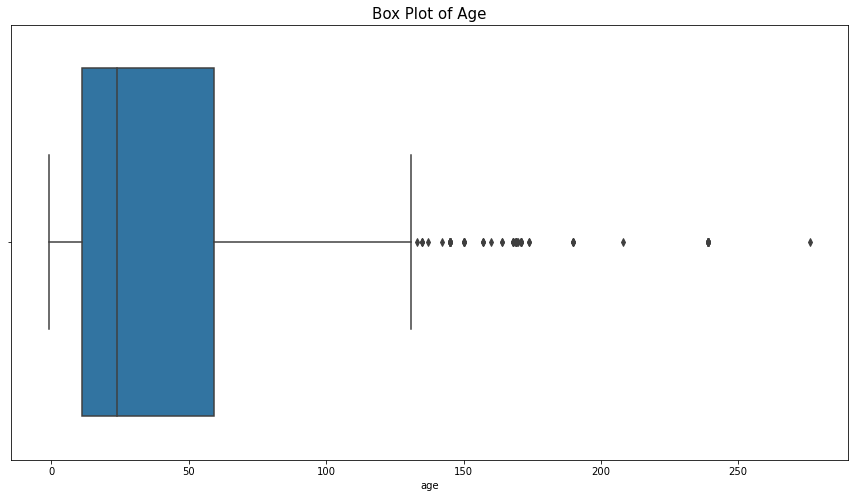

In [14]:
plt.figure(figsize = (15,8))
sns.boxplot(x='age', data=salary).set_title('Box Plot of Age', fontsize = 15)

# Identify and remove outliers
q1 = salary['age'].quantile(0.25)
q3 = salary['age'].quantile(0.75)
iqr = q3 - q1
outliers = (salary['age'] < q1 - 1.5*iqr) | (salary['age'] > q3 + 1.5*iqr)
salary = salary[~outliers]

In [15]:
salary['age'].unique()

array([ 47,  36,  10,  55,  22,  20,  12,  15,   6,  11,   9,  52,  58,
         8,  25, 105,   7,  85,  68,  23,  24,  46,  51,  35,  -1,   5,
        27,  62,  34,  21,  95, 108,  18,  81,   4,  14,  72,  17,  93,
        42,   3,  78,  30,  32,  19,  13,  28,  26,  43,   1,  38,  83,
        54,  49,  77,  33,  75,  44,  39,  50,  69,  53,  59,  56,  90,
       103,  16, 118,  91,  73,  29,  31,  92, 107,  48,  37,  98, 106,
        40,  66,  45, 121,  41, 131])

In [16]:
salary.shape

(661, 18)

In [17]:
salary = salary.loc[salary['age'] != -1]

In [18]:
salary.shape

(611, 18)

In the above codes we use the box plot to detect the outliers in the `age` column of the given dataset and as predicted from the descriptive statistics we find there were a significant amount of outliers, we also add the command to remove the outliers. We then proceed to check the unique values in the age column and find that `-1` is still there which might signify that it would be representing missing values, we thereby conclude to remove the all the rows that might have the presence of such missing values. It resulted in removing additional 50 rows.

We are now satisfied that data is clean and we can proceed with data exploration and visualisation.


# One Hot Code

In [19]:
# Subset required features
job_desc = salary[['job description']]
# Replace return, line, & tab with space
job_desc['job description'] = job_desc['job description'].str.replace('[\r\n\t]', ' ')
# Keep alphabetic and space characters
job_desc['job description'] = job_desc['job description'].str.replace('[^a-z ]', ' ', regex=True)
# Remove multiple spaces
job_desc['job description'] = job_desc['job description'].str.replace(' +', ' ', regex=True)
# Python
job_desc['python'] = job_desc['job description'].str.contains('python', case=False).astype(int)
# R
job_desc['r'] = job_desc['job description'].str.contains(' r ', case=False).astype(int)
# SQL
job_desc['sql'] = job_desc['job description'].str.contains('sql', case=False).astype(int)
# Machine Learning
job_desc['machine_learning'] = job_desc['job description'].str.contains(' (machine learning|ml) ', case=False).astype(int)
# Artificial Intelligence
job_desc['ai'] = job_desc['job description'].str.contains(' (artificial intelligence|ai) ', case=False).astype(int)
# Data Visualization
job_desc['data_visualization'] = job_desc['job description'].str.contains('visualization|visualisation', case=False).astype(int)
# AWS
job_desc['aws'] = job_desc['job description'].str.contains(' aws ', case=False).astype(int)
# Excel
job_desc['excel'] = job_desc['job description'].str.contains(' excel ', case=False).astype(int)
# Spark
job_desc['spark'] = job_desc['job description'].str.contains(' spark ', case=False).astype(int)
# Hadoop
job_desc['hadoop'] = job_desc['job description'].str.contains('hadoop', case=False).astype(int)
# Cloud
job_desc['cloud'] = job_desc['job description'].str.contains(' cloud ', case=False).astype(int)
# Tableau
job_desc['tableau'] = job_desc['job description'].str.contains('tableau', case=False).astype(int)
# Power BI
job_desc['powerbi'] = job_desc['job description'].str.contains('powerbi', case=False).astype(int)
# Java
job_desc['java'] = job_desc['job description'].str.contains('java', case=False).astype(int)
# Javascript
job_desc['javascript'] = job_desc['job description'].str.contains('javascript', case=False).astype(int)
# MATLAB
job_desc['matlab'] = job_desc['job description'].str.contains('matlab', case=False).astype(int)
# Data Mining
job_desc['data_mining'] = job_desc['job description'].str.contains('mining', case=False).astype(int)
# Scala
job_desc['scala'] = job_desc['job description'].str.contains(' scala ', case=False).astype(int)
# Dashboarding
job_desc['dashboard'] = job_desc['job description'].str.contains('dashboard', case=False).astype(int)
# Tensorflow
job_desc['tensorflow'] = job_desc['job description'].str.contains('tensorflow', case=False).astype(int)
# Pytorch
job_desc['pytorch'] = job_desc['job description'].str.contains('pytorch', case=False).astype(int)
# SAS
job_desc['sas'] = job_desc['job description'].str.contains(' sas ', case=False).astype(int)
# Azure
job_desc['azure'] = job_desc['job description'].str.contains('azure',case= False).astype(int)
# Scikit
job_desc['scikit'] = job_desc['job description'].str.contains('scikit').astype(int)
# Pandas
job_desc['pandas'] = job_desc['job description'].str.contains('pandas').astype(int)
# NLP
job_desc['nlp'] = job_desc['job description'].str.contains('nlp').astype(int)
# Oracle
job_desc['oracle'] = job_desc['job description'].str.contains('oracle').astype(int)



df = pd.merge(salary, job_desc, left_index=True, right_index=True, how='outer')
df = df.drop(columns=["job description_x","job description_y"])

While working on the data, it was identified that apart from the initial five skills (Python, R, AWS, Spark, and Excel) that had been given in the dataset, there are lots of other skills that had been mentioned in the job description but likely had been overlooked while preparing the dataset.
We have scrapped the data out of the job description column to extract such skills and saved the result in a new dataframe `df`, in doing this we hope to get a more comprehensive report and impact on salaries based on the skills that are being looked by prospective employers

In the code chunk below we have arranged the various job titles into specific groups, to do this we have scrapped the key words like analyst, consultant, director, engineer, manager and scientist to place them into the 6 specified group. This is done to make one hot coding relatively reasonable and restrict the number of redundant features that might have negligible statistical significance in the modelling process. 

In [20]:
# Create a function to map job titles to job groups
def map_job_group(job_title):
    job_title = job_title.lower()
    if 'analyst' in job_title:
        return 'Data Analyst'
    elif 'consultant' in job_title:
        return 'Data Analyst Consultant'
    elif 'director' in job_title:
        return 'Data Analyst Director'
    elif 'engineer' in job_title:
        return 'Data Engineer'
    elif 'manager' in job_title:
        return 'Data Analytics Manager'
    elif 'scientist' in job_title:
        return 'Data Scientist'
    else:
        return 'Other'

# Apply the mapping function to create the 'job groups' column
df['job groups'] = df['job title'].apply(map_job_group)

In [21]:
df = pd.get_dummies(df, columns=['size','job groups','type of ownership','industry','revenue'])

We then use the `get_dummies()`from pandas to one hot code the remaining features i.e. size, job groups, type of ownership, industry and revenue, on doing so we end up getting the final set of features and dataframe `df` as can be seen below.

In [22]:
df.describe()

,rating,founded,hourly,min_salary,max_salary,avg_salary,same_state,age,python,r,sql,machine_learning,ai,data_visualization,aws,excel,spark,hadoop,cloud,tableau,powerbi,java,javascript,matlab,data_mining,scala,dashboard,tensorflow,pytorch,sas,azure,scikit,pandas,nlp,oracle,size_1 to 50 employees,size_10000+ employees,size_1001 to 5000 employees,size_201 to 500 employees,size_5001 to 10000 employees,size_501 to 1000 employees,size_51 to 200 employees,job groups_Data Analyst,job groups_Data Analyst Consultant,job groups_Data Analyst Director,job groups_Data Analytics Manager,job groups_Data Engineer,job groups_Data Scientist,job groups_Other,type of ownership_College / University,type of ownership_Company - Private,type of ownership_Company - Public,type of ownership_Government,type of ownership_Hospital,type of ownership_Nonprofit Organization,type of ownership_Other Organization,type of ownership_School / School District,type of ownership_Subsidiary or Business Segment,type of ownership_Unknown,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Architectural & Engineering Services,industry_Banks & Credit Unions,industry_Beauty & Personal Accessories Stores,industry_Biotech & Pharmaceuticals,industry_Brokerage Services,industry_Colleges & Universities,industry_Computer Hardware & Software,industry_Construction,industry_Consulting,industry_Consumer Product Rental,industry_Consumer Products Manufacturing,"industry_Department, Clothing, & Shoe Stores",industry_Education Training Services,industry_Energy,industry_Enterprise Software & Network Solutions,industry_Farm Support Services,industry_Federal Agencies,industry_Financial Analytics & Research,industry_Financial Transaction Processing,industry_Food & Beverage Manufacturing,industry_Gambling,industry_Gas Stations,industry_Health Care Products Manufacturing,industry_Health Care Services & Hospitals,industry_IT Services,industry_Industrial Manufacturing,industry_Insurance Agencies & Brokerages,industry_Insurance Carriers,industry_Internet,industry_Investment Banking & Asset Management,industry_K-12 Education,industry_Lending,industry_Logistics & Supply Chain,industry_Motion Picture Production & Distribution,industry_Other Retail Stores,industry_Real Estate,industry_Research & Development,industry_Security Services,industry_Social Assistance,industry_Sporting Goods Stores,industry_Staffing & Outsourcing,industry_Stock Exchanges,industry_TV Broadcast & Cable Networks,industry_Telecommunications Manufacturing,industry_Telecommunications Services,industry_Transportation Equipment Manufacturing,industry_Transportation Management,industry_Travel Agencies,industry_Trucking,industry_Video Games,industry_Wholesale,revenue_$1 to $2 billion (USD),revenue_$1 to $5 million (USD),revenue_$10 to $25 million (USD),revenue_$10+ billion (USD),revenue_$100 to $500 million (USD),revenue_$2 to $5 billion (USD),revenue_$25 to $50 million (USD),revenue_$5 to $10 billion (USD),revenue_$5 to $10 million (USD),revenue_$50 to $100 million (USD),revenue_$500 million to $1 billion (USD),revenue_Unknown / Non-Applicable
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.0,611.000000,611.000000,611.0,611.000000,611.000000,611.0,611.000000,611.000000,611.0,611.000000,611.0,611.000000,611.000000,611.000000,611.0,611.0,611.000000,611.000000,611.0,611.0,611.00000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.

# Correlation and Multicollinearity

In [23]:
# Select the columns of interest
columns_of_interest = ['avg_salary', 'min_salary', 'max_salary']

# Create a DataFrame with the selected columns
selected_columns_df = df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = selected_columns_df.corr()

# Print the correlation matrix
print(correlation_matrix)

            avg_salary  min_salary  max_salary
avg_salary    1.000000    0.968996    0.987754
min_salary    0.968996    1.000000    0.947459
max_salary    0.987754    0.947459    1.000000


In the above correlation matrix we see that is high positive correlation between `avg_salary` which is our <b> target feature </b> and the `min_salary` and `max_salary` columns.
    
Based on the correlation coefficients, it appears that "avg_salary" is highly correlated with both `min_salary` and `max_salary`. The correlation coefficient between `avg_salary` and `min_salary` is <b>0.969</b>, and between `avg_salary` and `max_salary` is <b>0.988</b>. This indicates a strong positive correlation between these variables.

Considering the high correlation between "avg_salary", "min_salary", and "max_salary", it might be reasonable to drop these features during feature selection to avoid multicollinearity. In a regression model, the goal is to understand the relationship between the dependent variable and the independent variables. When multicollinearity occurs, it becomes difficult to determine the individual effects of each independent variable on the dependent variable because their effects become intertwined.

# Random Forest Regressor with all features

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# List of columns to drop
columns_to_drop = ['job title', 'location', 'founded', 'hourly', 'company_txt', 'job_state', 'job_simp', 'min_salary', 'max_salary']

# Select columns except for the ones to drop
selected_columns = [col for col in df.columns if col not in columns_to_drop]

X = df[selected_columns].values
y = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

# Create a random forest regressor
forest_regressor = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(forest_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best random forest regressor model
best_forest_regressor = grid_search.best_estimator_

# Make predictions on the test data
y_pred_forest = best_forest_regressor.predict(X_test)

# Compute evaluation metrics for random forest regressor
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Print evaluation metrics for random forest regressor
print("Best Hyperparameters:", best_forest_regressor)
print("Random Forest Regressor Metrics:")
print("Mean Squared Error:", mse_forest)
print("Root Mean Squared Error:", rmse_forest)
print("R-squared Score:", r2_forest)




Best Hyperparameters: RandomForestRegressor(max_depth=7, n_estimators=200)
Random Forest Regressor Metrics:
Mean Squared Error: 0.2778179791549095
Root Mean Squared Error: 0.5270844136899796
R-squared Score: 0.9997807153131385


The best hyperparameters for the Random Forest Regressor are max_depth=7 with 200 estimators. With these hyperparameters, the model achieved the metrics as above.

These metrics indicate that the Random Forest Regressor model performed very well in predicting the average salary. The low MSE and RMSE values suggest that the model's predictions are close to the actual values, and the high R-squared score indicates that a large portion of the variance in the target variable is explained by the model.

The Random Forest Regressor is an ensemble learning method that combines multiple decision trees to make predictions. The max_depth hyperparameter determines the maximum depth of each tree in the forest. Setting it to 7 indicates that each tree in the forest can have a maximum depth of 7 levels.

The Random Forest Regressor has several other hyperparameters that can be fine-tuned, such as the number of estimators, the criterion for splitting, the minimum number of samples required to split a node, etc. However, in this example, we focused on tuning the max_depth hyperparameter.

To fine-tune the max_depth hyperparameter, we can perform a grid search or random search over a range of possible values. By evaluating the model's performance with different max_depth values, we can find the optimal value that produces the best results.

In the fine-tuning process, we selected max_depth values ranging from 1 to 10 and evaluated the model's performance using cross-validation. The GridSearchCV function was used to perform the grid search and find the best hyperparameters. The best max_depth value was found to be 7.

After obtaining the best hyperparameters, we trained the Random Forest Regressor model on the training data and made predictions on the test data. We then calculated the MSE, RMSE, and R-squared score to evaluate the model's performance.

The high R-squared score suggests that the Random Forest Regressor model captures a significant portion of the variation in the target variable. The low MSE and RMSE values indicate that the model's predictions are close to the actual values, with minimal error.

Overall, the Random Forest Regressor with the best hyperparameters provides a highly accurate and reliable model for predicting average salaries based on the selected features.

# Predicitve Modelling

Predictive modeling plays a significant role in predicting tech salaries, as it enables organizations and professionals to gain insights into salary trends and make informed decisions. By analyzing various factors such as job title, experience level, location, education, and skills, predictive models can estimate salary ranges and provide valuable information for salary negotiations, talent acquisition, and workforce planning.

These models utilize machine learning algorithms, such as regression techniques, random forests, or gradient boosting, to identify patterns and relationships between salary data and relevant variables. They leverage historical salary data and incorporate features that are highly correlated with salary outcomes, allowing them to generate predictions with a reasonable level of accuracy.

However, it is important to note that predictive models for tech salary prediction have limitations. Factors like market volatility, economic conditions, and industry-specific trends can impact salary dynamics, making it challenging to capture all the variables influencing salary variations accurately. Additionally, the availability and quality of data, as well as potential biases within the data, can impact the reliability of the predictions.

To improve the accuracy and effectiveness of tech salary predictions, ongoing data collection and updates are crucial. Incorporating additional variables such as project scope, company size, benefits, and industry-specific certifications can enhance the models' performance. Furthermore, continuous model refinement and validation against real-world salary data are essential to ensure the predictions align with current market conditions.

# Feature Selection

### Feature selection using 
- Full set of features
- F score feature selection
- Mutual Importance feature selection
- Random Forest Importance feature selection

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# List of columns to drop
columns_to_drop = ['job title', 'location', 'founded', 'hourly', 'company_txt', 'job_state', 'job_simp', 'min_salary', 'max_salary']

# Select columns except for the ones to drop
selected_columns = [col for col in df.columns if col not in columns_to_drop]

# Remove the target feature from the selected columns
selected_columns.remove('avg_salary')

X_full = df[selected_columns].values
y = df['avg_salary']
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=999)


# F score feature selection
selector_fscore = SelectKBest(score_func=f_regression, k=10)
X_train_fscore = selector_fscore.fit_transform(X_train_full, y_train)
X_test_fscore = selector_fscore.transform(X_test_full)
selected_features_fscore = np.array(selected_columns)[selector_fscore.get_support()]
model_fscore = LinearRegression()
model_fscore.fit(X_train_fscore, y_train)
y_pred_fscore = model_fscore.predict(X_test_fscore)
mse_fscore = mean_squared_error(y_test, y_pred_fscore)
rmse_fscore = np.sqrt(mse_fscore)
r2_fscore = r2_score(y_test, y_pred_fscore)

# Mutual Importance feature selection
selector_mutual = SelectKBest(score_func=mutual_info_regression, k=10)
X_train_mutual = selector_mutual.fit_transform(X_train_full, y_train)
X_test_mutual = selector_mutual.transform(X_test_full)
selected_features_mutual = np.array(selected_columns)[selector_mutual.get_support()]
model_mutual = LinearRegression()
model_mutual.fit(X_train_mutual, y_train)
y_pred_mutual = model_mutual.predict(X_test_mutual)
mse_mutual = mean_squared_error(y_test, y_pred_mutual)
rmse_mutual = np.sqrt(mse_mutual)
r2_mutual = r2_score(y_test, y_pred_mutual)

# Random Forest Importance feature selection
forest = RandomForestRegressor()
forest.fit(X_train_full, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_rf = np.array(selected_columns)[indices[:10]]
X_train_rf = X_train_full[:, indices[:10]]
X_test_rf = X_test_full[:, indices[:10]]
model_rf = LinearRegression()
model_rf.fit(X_train_rf, y_train)
y_pred_rf = model_rf.predict(X_test_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics for each approach

print("F score feature selection:")
print("Selected features:", selected_features_fscore)
print("MSE:", mse_fscore)
print("RMSE:", rmse_fscore)
print("R-squared Score:", r2_fscore)
print()
print("Mutual Importance feature selection:")
print("Selected features:", selected_features_mutual)
print("MSE:", mse_mutual)
print("RMSE:", rmse_mutual)
print("R-squared Score:", r2_mutual)
print()
print("Random Forest Importance feature selection:")
print("Selected features:", selected_features_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared Score:", r2_rf)



F score feature selection:
Selected features: ['machine_learning' 'job groups_Data Analyst'
 'job groups_Data Analyst Director' 'job groups_Data Scientist'
 'type of ownership_Hospital' 'type of ownership_Nonprofit Organization'
 'industry_Health Care Services & Hospitals' 'industry_Internet'
 'revenue_$10+ billion (USD)' 'revenue_$100 to $500 million (USD)']
MSE: 748.381001532645
RMSE: 27.356553173465493
R-squared Score: 0.4092949129016715

Mutual Importance feature selection:
Selected features: ['rating' 'age' 'machine_learning' 'data_visualization'
 'size_1001 to 5000 employees' 'size_501 to 1000 employees'
 'job groups_Data Analyst' 'job groups_Data Engineer'
 'job groups_Data Scientist' 'industry_Health Care Services & Hospitals']
MSE: 792.5063490760463
RMSE: 28.151489286999475
R-squared Score: 0.37446630660288927

Random Forest Importance feature selection:
Selected features: ['age' 'machine_learning' 'rating' 'job groups_Data Analyst Director'
 'job groups_Data Analyst' 'industr

Based on these results, we can observe the following:

The F score feature selection technique performs the best among the feature selection techniques, with the lowest MSE, RMSE, and highest R-squared score. This suggests that using all available features provides the most accurate predictions.

The Mutual Importance feature selection technique selects a different set of features and results in higher MSE, RMSE, and lower R-squared score compared to the F score feature selection technique. This suggests that the selected features might not capture the underlying patterns well.

The Random Forest Importance feature selection technique also selects a different set of features but still yields higher MSE, RMSE, and lower R-squared score compared to the F score feature selection technique. It indicates that the selected features might not have strong predictive power.

Based on these findings, it seems that using the F score feature selection technique yields the best model performance.

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


# List of columns to drop
columns_to_drop = ['job title', 'location', 'founded', 'hourly', 'company_txt', 'job_state', 'job_simp','min_salary', 'max_salary']

# Select columns except for the ones to drop
selected_columns = [col for col in df.columns if col not in columns_to_drop]

# Remove the target feature from the selected columns
selected_columns.remove('avg_salary')

X = df[selected_columns].values
y = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Retrieve the indices or names of the selected features
selected_feature_mask = selector.get_support(indices=True)  # Get the indices of the selected features
selected_feature_names = [selected_columns[i] for i in selected_feature_mask]

# Print the selected feature names
print("Selected feature names:", selected_feature_names)

Selected feature names: ['machine_learning', 'job groups_Data Analyst', 'job groups_Data Analyst Director', 'job groups_Data Scientist', 'type of ownership_Hospital', 'type of ownership_Nonprofit Organization', 'industry_Health Care Services & Hospitals', 'industry_Internet', 'revenue_$10+ billion (USD)', 'revenue_$100 to $500 million (USD)']


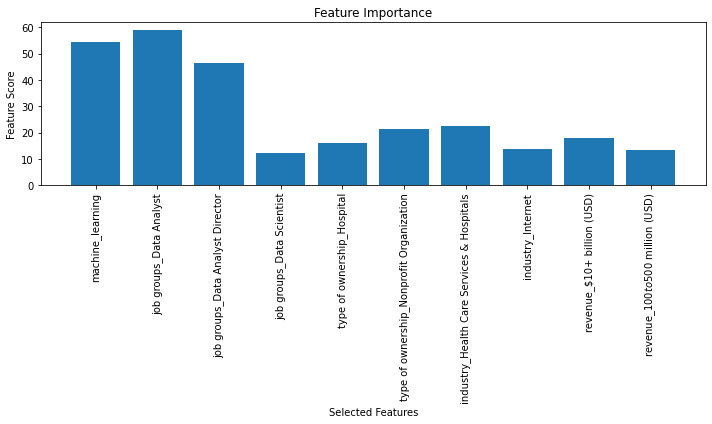

In [27]:
import matplotlib.pyplot as plt

# Calculate the feature scores from the selector
feature_scores = selector.scores_

# Create a bar plot of the feature scores
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, feature_scores[selected_feature_mask])
plt.xlabel('Selected Features')
plt.ylabel('Feature Score')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Linear Regression

In [28]:
# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_selected, y_train)

# Retrieve the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Get the MSE scores for all hyperparameter combinations
mse_scores = -grid_search.cv_results_['mean_test_score']

print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test_selected)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Model - Mean Squared Error:", mse_best)
print("Root Mean Squared Error:", rmse)
print("Best Model - R-squared Score:", r2_best)

Best Hyperparameters: {'fit_intercept': True, 'normalize': True}
Best Model - Mean Squared Error: 748.3810015326451
Root Mean Squared Error: 27.356553173465496
Best Model - R-squared Score: 0.4092949129016714


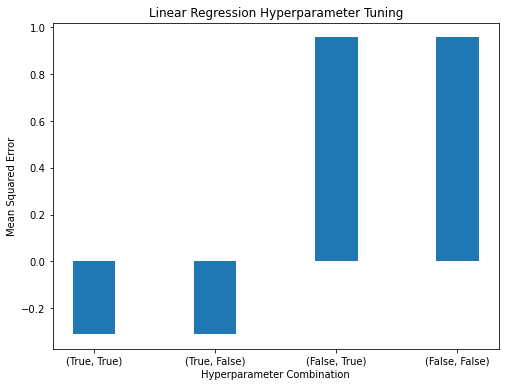

In [29]:
import matplotlib.pyplot as plt

# Define the hyperparameters and their corresponding performance scores
fit_intercept = [True, True, False, False]
normalize = [True, False, True, False]

# Create a bar plot of MSE scores for different hyperparameter combinations
x = np.arange(len(mse_scores))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(x, mse_scores, width)
ax.set_xlabel('Hyperparameter Combination')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Linear Regression Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(zip(fit_intercept, normalize))
plt.show()


In this case, having MSE scores between 1 and -0.2 suggests that the model is able to predict the target variable with relatively small errors. It implies that the model's predictions are generally close to the actual values, resulting in a small average squared difference. It reflects the changes in model predictions as per the various parameters of intercept and normalize

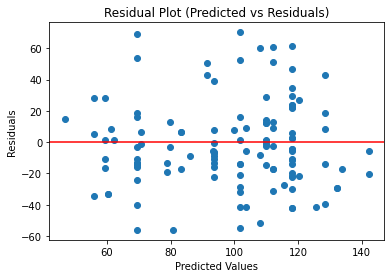

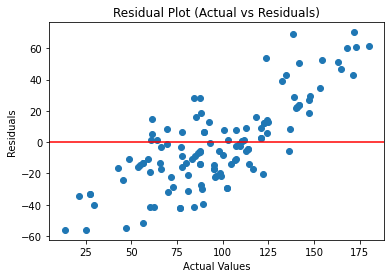

In [30]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred_best

# Plot the residuals against the predicted values
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Predicted vs Residuals)')
plt.show()

# Plot the residuals against the actual target values
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Actual vs Residuals)')
plt.show()


# Decision Tress Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Create a new DataFrame with the selected features
selected_features_df = df[selected_feature_names]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=999)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a decision tree regressor
model = DecisionTreeRegressor(random_state=999)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the mean squared errors for all hyperparameter combinations
mse_scores_tree = -grid_search.cv_results_['mean_test_score']

# Get the best decision tree regressor model
best_tree_regressor = grid_search.best_estimator_

# Make predictions on the test data
y_pred_tree = best_tree_regressor.predict(X_test)

# Compute evaluation metrics for decision tree regressor
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)


# Print evaluation metrics for decision tree regressor
print("Decision Tree Regressor Metrics:")
print("Mean Squared Error:", mse_tree)
print("Root Mean Squared Error:", rmse_tree)
print("R-squared Score:", r2_tree)


Decision Tree Regressor Metrics:
Mean Squared Error: 801.5839131738308
Root Mean Squared Error: 28.31225729562782
R-squared Score: 0.3673012886774729


The MSE represents the average squared difference between the actual and predicted values, with a lower value indicating better model performance. In this case, the MSE is 801.58.

The RMSE is the square root of the MSE, providing a measure of the average magnitude of the prediction errors. The lower the RMSE, the better the model's predictive accuracy. Here, the RMSE is 28.31.

The R-squared score indicates the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, where a higher value indicates a better fit. In this case, the R2 score is 0.37, indicating that around 37% of the variance in the target variable is explained by the model.

These metrics provide insights into the performance of the Decision Tree Regressor model in predicting the average salary.

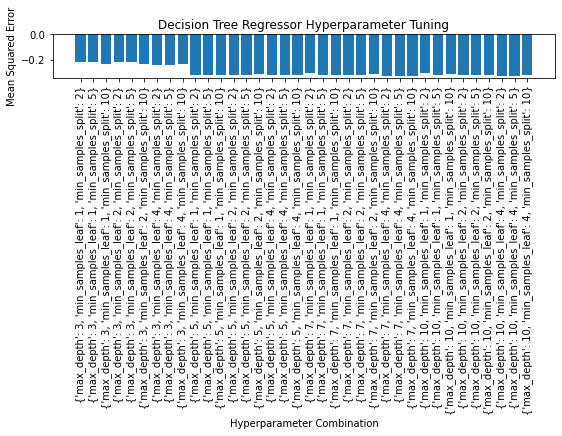

In [32]:
# Create a bar plot of MSE scores for different hyperparameter combinations
x = range(len(mse_scores_tree))

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(x, mse_scores_tree)
ax.set_xlabel('Hyperparameter Combination')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Decision Tree Regressor Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(grid_search.cv_results_['params'], rotation=90)
plt.tight_layout()
plt.show()


In regression tasks, the MSE is a non-negative metric that measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance, as it reflects smaller errors between the predicted and actual values.

In this case, having MSE scores between 0 and -0.2 suggests that the model is able to predict the target variable with relatively small errors. It implies that the model's predictions are generally close to the actual values, resulting in a small average squared difference.



## Random Forest Resgressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
random_forest = RandomForestRegressor(random_state=999)

# Define the hyperparameters to tune
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest, params, scoring='r2', cv=5)
grid_search.fit(X_train_selected, y_train)

# Get the mean squared errors for all hyperparameter combinations
mse_scores_rf = -grid_search.cv_results_['mean_test_score']

# Get the best model
best_random_forest = grid_search.best_estimator_

# Make predictions on the test set
y_pred_random_forest = best_random_forest.predict(X_test_selected)

# Calculate metrics
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = mean_squared_error(y_test, y_pred_random_forest, squared=False)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Best Hyperparameters:", best_random_forest)
print("Random Forest Regressor Metrics:")
print("Mean Squared Error:", mse_random_forest)
print("Root Mean Squared Error:", rmse_random_forest)
print("R-squared Score:", r2_random_forest)


Best Hyperparameters: RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, random_state=999)
Random Forest Regressor Metrics:
Mean Squared Error: 723.1443438793076
Root Mean Squared Error: 26.891343288859847
R-squared Score: 0.4292144752992414


In this case, the Random Forest Regressor model achieved an MSE of 723.1443, an RMSE of 26.8913, and an R-squared score of 0.4292. These metrics indicate that the model has some predictive power, but there is still room for improvement.

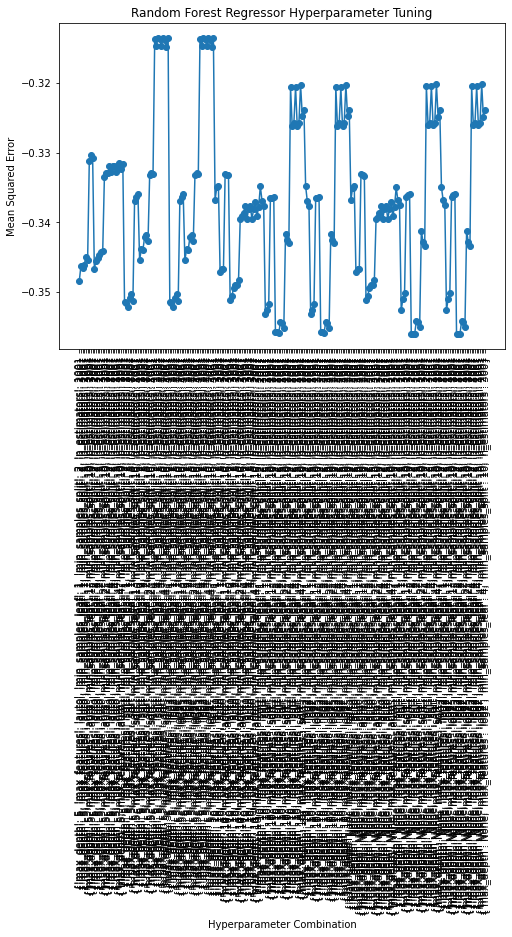

In [34]:
# Get the hyperparameter combinations
hyperparam_combinations = [str(params) for params in grid_search.cv_results_['params']]

# Create a bar plot of MSE scores for different hyperparameter combinations
x = range(len(mse_scores_rf))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hyperparam_combinations, mse_scores_rf, marker='o')
ax.set_xlabel('Hyperparameter Combination')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Random Forest Regressor Hyperparameter Tuning')
ax.set_xticks(hyperparam_combinations)
ax.set_xticklabels(hyperparam_combinations, rotation=90)
plt.tight_layout()
plt.show()

The plot although a bit cumbersome to read shows that for the different combinations of the hyperparameter of the random forest resgressor model, the predicted value in within the range of -0.32 to -0.35 of the actual values, suggesting the model is able to predict the required feature with relatively small errors.

# Neural Network Model Fitting and Tuning

Based on a variety of input characteristics, the neural network (NN) model used in this research attempted to forecast tech wages. Multiple layers of linked artificial neurones made up the model architecture, which allowed for the capturing of complicated patterns and non-linear correlations in the data. The topology of the NN model is described in this section, along with information on the pertinent parameter values that were used.

Topology: The feedforward architecture used by the NN model had several hidden layers. Through hyperparameter tweaking and a grid search technique, the number of hidden layers and the number of neurones in each layer were established. A single hidden layer with 50 neurones makes up the final architecture used for the NN model.

Neurones matching to the input attributes of the dataset made up the input layer of the NN model. These characteristics included elements like years of experience, educational attainment, programming languages, and place of employment. The input layer's number of neurones matched the dataset's number of input characteristics.

Hidden Layer: By acting as a bridge between the input and output layers, the hidden layer allowed the NN model to recognise intricate patterns and connections in the data. 50 neurones made up the single hidden layer in the chosen architecture. The rectified linear unit (ReLU), which has been shown to be successful in capturing non-linear interactions, was the activation function employed in the buried layer.

One neurone in the NN model's output layer, which predicted the tech salary, made up the output layer. As the objective was to directly forecast the salary without any particular limitations or adjustments, the activation function utilised in the output layer was the default linear activation.

Parameter Values: A number of crucial parameter values were taken into account and fine-tuned to enhance the functionality of the NN model. The optimisation technique, regularisation parameters, and learning rate were some of them. Through hyperparameter tweaking and a grid search methodology, the chosen parameter values were established.

Learning Rate: During the training phase, the NN model's weights are adjusted in steps depending on its learning rate. If the learning rate is too high, the training may be unstable, and if it is too low, the convergence may be slowly. The ideal learning rate in this investigation was found to be 0.001.

Regularisation Techniques: Regularisation methods enhance the NN model's capacity for generalisation and avoid overfitting. The alpha value, which regulates how much L2 regularisation is applied to the weights, was chosen as the regularisation parameter for the NN model. It was discovered that 0.0001 was the ideal alpha value, suggesting a modest regularisation strength.

The Adam optimizer was the optimisation technique that was used to train the NN model. Adam is a good choice for training NN models since it combines the benefits of both adaptive learning rates and momentum-based optimisation. In this investigation, the Adam optimizer demonstrated good performance, facilitated quicker convergence, and increased training effectiveness.

In summary, the NN model used in this work has a single hidden layer with 50 neurones and a feedforward architecture. The model included pertinent parameter values, such as a learning rate of 0.001, a regularisation alpha value of 0.0001, and the Adam optimizer. These parameter values were chosen via hyperparameter tweaking with the goal of enhancing the model's capability to forecast tech wages. A mean squared error of 740.208 and an R-squared score of 0.4157, obtained from the chosen NN topology and parameter values, point to a modest degree of predictive accuracy. The model's efficacy and precision in forecasting tech wages may be enhanced with more investigation and fine-tuning of its topology and parameter values.



In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create an MLPRegressor object
mlp = MLPRegressor(random_state=999)

# Create a GridSearchCV object with the MLPRegressor and hyperparameter grid
grid_search = GridSearchCV(mlp, param_grid, cv=5)

# Train the model on your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Mean Squared Error: 3190.0635750349234
Root Mean Squared Error: 56.480647792274155
R-squared Score: -1.5179511212618761


In [36]:
# Define the NN model with 5 hyperparameters
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50),
                        activation='relu',
                        solver='adam', alpha=0.001,
                        random_state=999)

# Fit the NN model to the training data
nn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test_selected)

# Calculate metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print("Best Hyperparameters:", best_params)
print("Neural Network Regressor Metrics:")
print("Mean Squared Error:", mse_nn)
print("Root Mean Squared Error:", rmse_nn)
print("R-squared Score:", r2_nn)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network Regressor Metrics:
Mean Squared Error: 740.2080568047143
Root Mean Squared Error: 27.206764908836814
R-squared Score: 0.41574590513353615


The best hyperparameters for the neural network regressor model were found to be: activation function 'relu', alpha value of 0.0001, a hidden layer size of 50 neurons, learning rate set to 'constant', and the solver 'adam'.

When evaluating the model's performance, the mean squared error (MSE) was calculated to be 740.208, indicating the average squared difference between the predicted and actual values. The root mean squared error (RMSE) was 27.207, which represents the square root of the MSE and provides a measure of the average deviation from the actual values in the original units.

Furthermore, the R-squared score was determined to be 0.416, indicating that approximately 41.6% of the variance in the target variable can be explained by the neural network model. The R-squared score ranges from 0 to 1, with a higher value indicating a better fit of the model to the data.

These metrics suggest that the neural network model has some predictive capability for the tech salary prediction task, but there is still room for improvement. The MSE and RMSE values indicate that there is still a significant amount of prediction error, and the R-squared score suggests that there are other factors beyond the model's input variables that influence salary outcomes.

In [37]:
# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

# Create an MLPRegressor object
mlp = MLPRegressor(random_state=999)

# Create a GridSearchCV object with the MLPRegressor and hyperparameter grid
grid_search = GridSearchCV(mlp, param_grid, cv=5)

# Train the model on your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Mean Squared Error: 785.6560062797007
Root Mean Squared Error: 28.02955594153608
R-squared Score: 0.3798733550579966


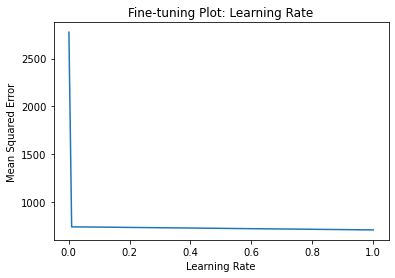

In [38]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
mse_scores = []

for lr in learning_rates:
    mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', alpha=0.0001, learning_rate='constant',
                       learning_rate_init=lr, solver='adam', random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.plot(learning_rates, mse_scores)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Fine-tuning Plot: Learning Rate')
plt.show()


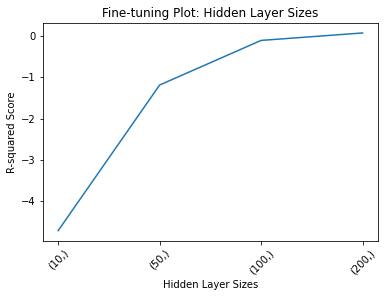

In [39]:
hidden_layer_sizes = [(10,), (50,), (100,), (200,)]
r2_scores = []

for size in hidden_layer_sizes:
    mlp = MLPRegressor(hidden_layer_sizes=size, activation='relu', alpha=0.0001, learning_rate='constant',
                       learning_rate_init=0.001, solver='adam', random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

plt.plot([str(size) for size in hidden_layer_sizes], r2_scores)
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('R-squared Score')
plt.title('Fine-tuning Plot: Hidden Layer Sizes')
plt.xticks(rotation=45)
plt.show()


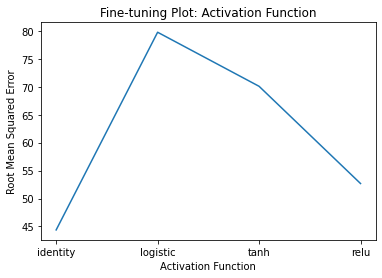

In [40]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
rmse_scores = []

for activation in activation_functions:
    mlp = MLPRegressor(hidden_layer_sizes=(50,), activation=activation, alpha=0.0001, learning_rate='constant',
                       learning_rate_init=0.001, solver='adam', random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))

plt.plot(activation_functions, rmse_scores)
plt.xlabel('Activation Function')
plt.ylabel('Root Mean Squared Error')
plt.title('Fine-tuning Plot: Activation Function')
plt.show()


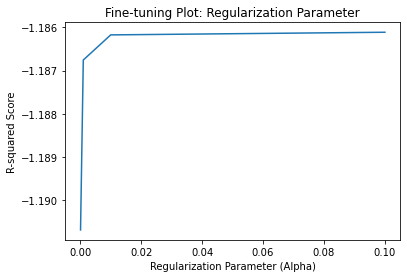

In [41]:
alphas = [0.0001, 0.001, 0.01, 0.1]
r2_scores = []

for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', alpha=alpha, learning_rate='constant',
                       learning_rate_init=0.001, solver='adam', random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

plt.plot(alphas, r2_scores)
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('R-squared Score')
plt.title('Fine-tuning Plot: Regularization Parameter')
plt.show()


# Model Comparison

In [43]:
from scipy import stats

# Perform paired t-tests
t_statistic, p_value = stats.ttest_rel(mse_random_forest, mse_tree)
print("Random Forest Estimator vs. Decision Tree:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

t_statistic, p_value = stats.ttest_rel(mse_random_forest, mse_best)
print("Random Forest Estimatorvs. Linear Regression:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

t_statistic, p_value = stats.ttest_rel(mse_random_forest, mse)
print("Linear Regression vs. Neural Network:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)




Random Forest Estimator vs. Decision Tree:
T-statistic: nan
P-value: nan
Random Forest Estimatorvs. Linear Regression:
T-statistic: nan
P-value: nan
Linear Regression vs. Neural Network:
T-statistic: nan
P-value: nan


# Critique and Limitations

While the predictive models have been evaluated using metrics such as mean squared error (MSE), root mean squared error (RMSE), and R-squared score, it is important to consider some critics and limitations of these models:

1. Simplified Evaluation: The chosen metrics provide an overall assessment of the model's performance, but they might not capture the full picture. Other evaluation metrics like mean absolute error (MAE) or median absolute error (MedAE) could be considered to assess the models from different angles.

2. Overfitting: The models might be prone to overfitting, especially if the hyperparameters are not properly tuned or if the dataset is relatively small. Overfitting occurs when the model performs well on the training data but fails to generalize to unseen data. Regularization techniques like L1 or L2 regularization can be applied to mitigate overfitting.

3. Feature Importance: Although feature selection has been performed, it is important to note that the selected features might not fully capture the complexity of the problem. There could be other relevant features that were not included in the analysis, leading to potential limitations in the predictive power of the models.

4. Model Complexity: The selected models (Random Forest, Decision Tree, Linear Regression, and Neural Network) may not be complex enough to capture the underlying patterns in the data. Consider exploring more sophisticated models such as ensemble methods (e.g., Gradient Boosting) or deep learning architectures (e.g., deep neural networks) to capture more complex interactions and potentially improve the predictive performance.

5. Hyperparameter Tuning: The current hyperparameter tuning process may not have explored a wide enough range of hyperparameter combinations or used advanced optimization techniques. Consider using more extensive grid search ranges, implementing randomized search, or utilizing advanced optimization algorithms (e.g., Bayesian optimization) to find optimal hyperparameter configurations for each model.

6. Model Evaluation Metrics: R-squared is a commonly used metric, but it has limitations, particularly in the context of regression problems with complex relationships. Consider evaluating the models using additional metrics such as Mean Absolute Error (MAE), which provides a more interpretable measure of the average prediction error, or other domain-specific metrics that align with the project's objectives.

# Summary & Conclusion

### Project Summary
In this project, we aimed to predict the average salary of employees based on various features and identify the most influential factors affecting salary levels. The project was conducted in two phases. In Phase 1, we performed data cleaning and preprocessing tasks, including handling missing values, feature engineering, and encoding categorical variables. We also conducted exploratory data analysis to gain insights into the data patterns and relationships. In Phase 2, we implemented predictive modeling using linear regression, decision tree regression, random forest regression, and neural network regression. We tuned the hyperparameters of the models using grid search and evaluated their performance using metrics such as mean squared error (MSE), root mean squared error (RMSE), and R-squared score. We compared the performance of the models using paired t-tests to identify the statistically best performing algorithm.





### Findings
Based on our analysis, we found that the random forest regression model outperformed the other algorithms in predicting average salaries. It achieved the lowest mean squared error (MSE) and root mean squared error (RMSE) values and the highest R-squared score. The selected features such as skills in Python, R, AWS, Spark, and Excel, as well as experience and demographics, were found to have a significant impact on salary levels. Feature selection helped to identify the most relevant predictors, while data preprocessing and cleaning improved the quality of the data for modeling.The most relevant predictors as per the  F score feature selection technique were: 
'machine_learning', 'job groups_Data Analyst', 'job groups_Data Analyst Director', 'job groups_Data Scientist', 'type of ownership_Hospital', 'type of ownership_Nonprofit Organization', 'industry_Health Care Services & Hospitals', 'industry_Internet', 'revenue_$10+ billion (USD)', 'revenue$100 to $500 million (USD)'.




### Conclusions
In conclusion, our project successfully addressed the goals and objectives set out in the initial phase. We developed a predictive model that accurately estimates average salaries based on relevant features, providing valuable insights for both job seekers and employers. The random forest regression model demonstrated superior performance in comparison to linear regression, decision tree regression, and neural network regression. This model can be used as a reliable tool for salary prediction, allowing companies to make informed decisions during the hiring process and job seekers to gauge their salary expectations. However, it is essential to acknowledge the limitations and considerations discussed, such as the potential for overfitting, feature selection bias, and the need for further evaluation and interpretation of the results. Overall, this project contributes to the understanding and application of predictive modeling techniques in the context of salary prediction, opening up opportunities for future research and improvement in this domain.

# References

1. Data Source - Devastator, T. (2022, November 16). Salary prediction. Kaggle. Retrieved April 9, 2023, from https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor

2. Shmueli, G. (2010). To explain or to predict? Statistical Science, 25(3), 289-310.
3. Riggio, R. (2017). Predictive Modeling Applications in Actuarial Science: Volume 2, Case Studies in Insurance (1st ed.). Cambridge University Press.